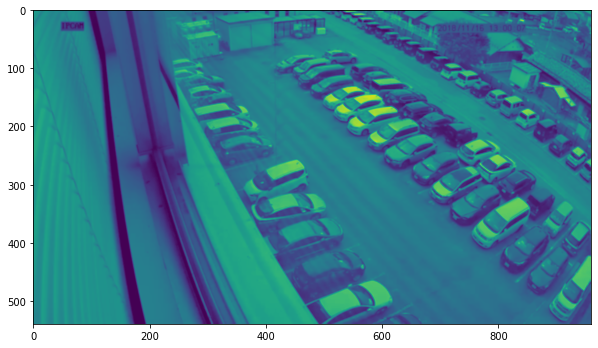

In [33]:
#https://postd.cc/image-processing-101/
import numpy as np
import cv2 
import glob
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# get binary image and apply Gaussian blur
coins = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1116-13-00-08.jpg")#2018-1006-10-15-10
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 140, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)

# # find contours
# coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # make copy of image
# coins_and_contours = np.copy(coins)

# # find contours of large enough area
# min_coin_area = 60
# large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# # draw contours
# cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

# # print number of contours
# print('number of coins: %d' % len(large_contours))


plt.imshow(coins_gray,clim=[0,255])

#cv2.imwrite("/Users/ShuntaroMiwa/parking_mono/.jpg*}") # 出力する場合

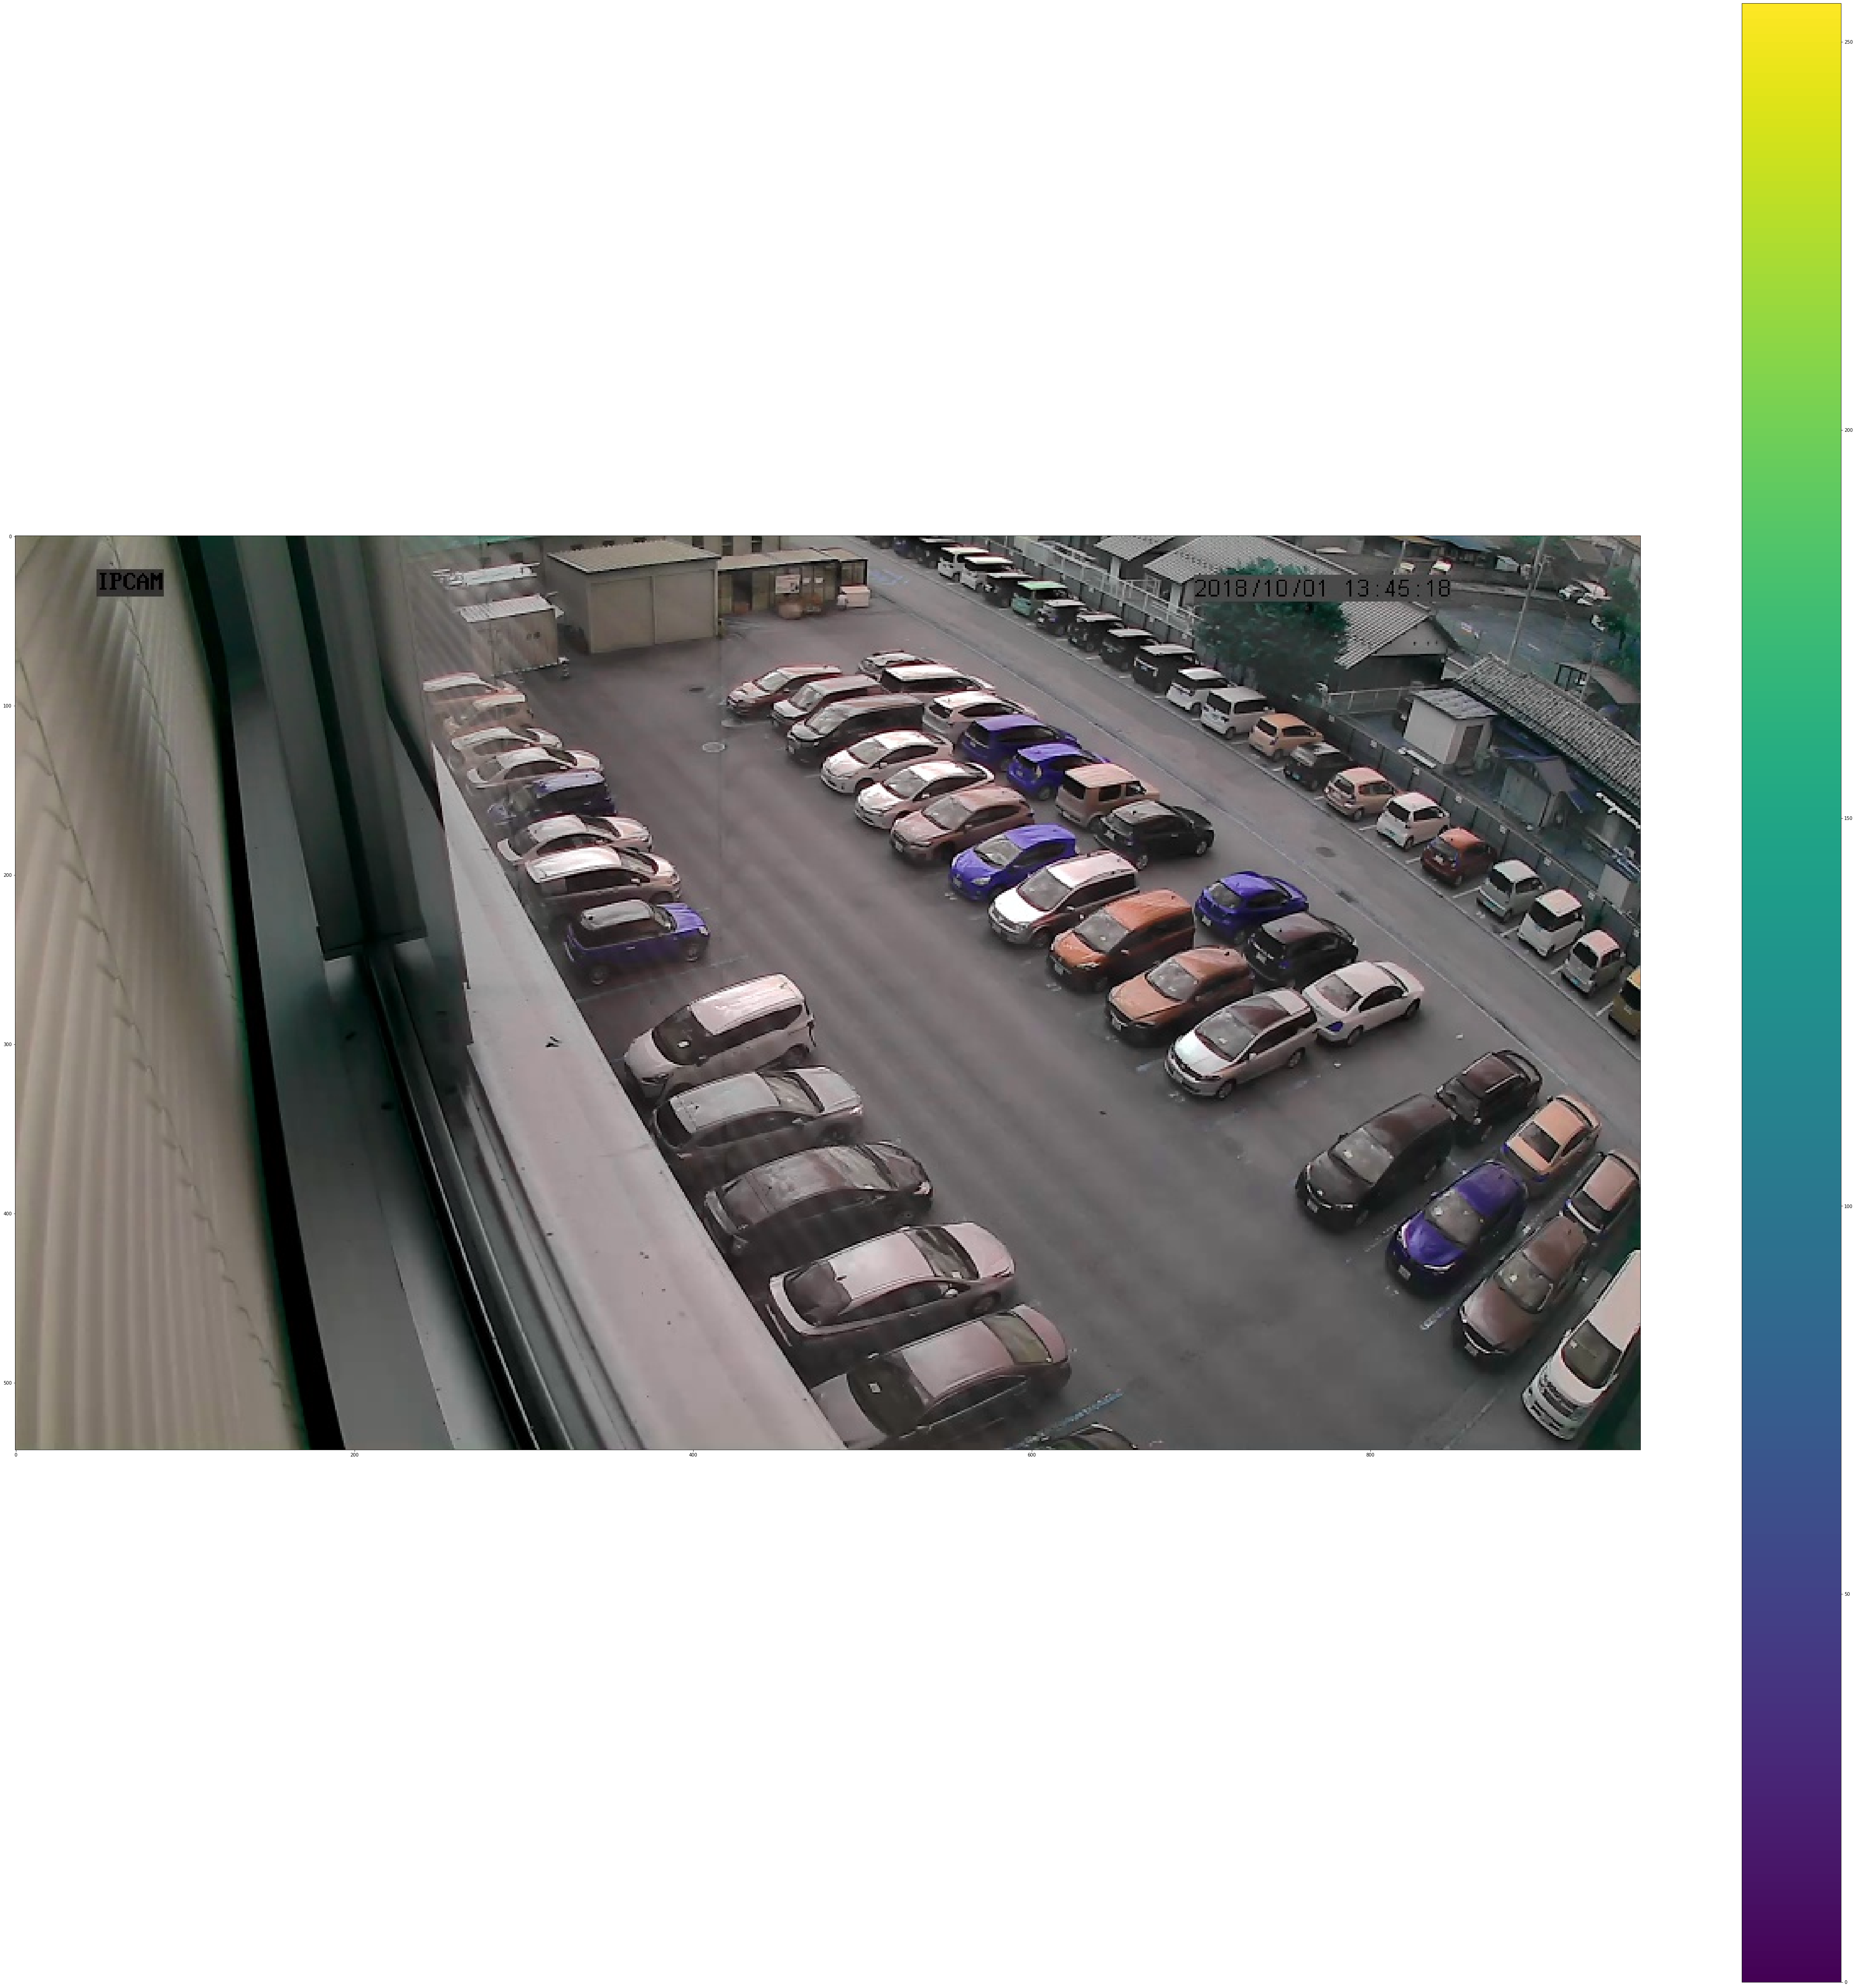

In [3]:
#https://cvtech.cc/std/

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(80,80))

for i in range(1):
    img = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")#+str(i)+".png",0)
   # print(type(img))

#     hsv_report =  get_hsv_report(img,True)
#     print(hsv_report)

#    plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

#    plt.subplot(4, 3, i)#一枚のプロットに複数グラフ
    plt.imshow(img)#,clim=[0,255]
    plt.colorbar()
#     plt.subplot(4, 3, i+3)
#     plt.imshow(cv2.cvtColor(img.astype(np.uint8),cv2.COLOR_GRAY2BGR))
#     plt.colorbar()
    
#     print(np.mean(img), np.std(img))
#     img = (img - np.mean(img))/np.std(img)*16+64
    
#     plt.subplot(4, 3, i+6)
#     plt.imshow(img,clim=[0,255])
#     plt.colorbar()
#     plt.subplot(4, 3, i+9)
#     Eplt.imshow(cv2.cvtColor(img.astype(np.uint8),cv2.COLOR_GRAY2BGR))
#     plt.colorbar()

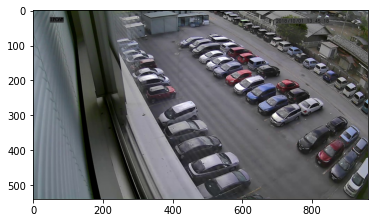

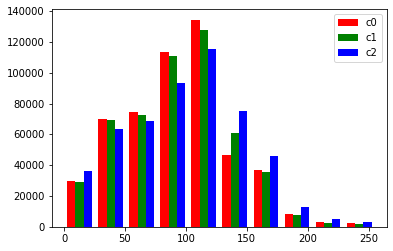

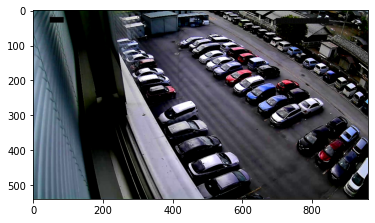

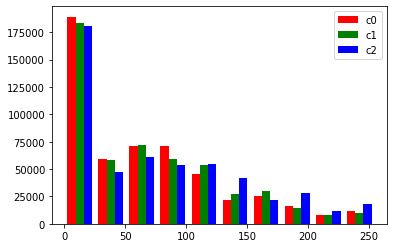

In [8]:
#画像の明るさ調整

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib
# matplotlib.use('TkAgg')
#plt.figure(figsize=(20,20))
#plt.gray()#gray設定？

dat = cv.imread( "/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg") #opencvのカラーデフォルトはBGR, flags=0はグレースケール？
a=2.0#コントラストの係数
b=-10#明るさの切片
dat_r = cv.cvtColor(dat, cv.COLOR_BGR2RGB) #matplotlibのカラーデフォルトはRGBのため、変換
plt.imshow(dat_r)
#cv.imshow("image",dat)#opencvのインライン表示が分からない・・

#print(np.shape(dat_r))#540, 960, 3

fig = plt.figure()
ax = plt.subplot(1,1,1)#軸。これがないとヒストグラムがplt.figure(figsize=(20,20))に引っ張られる

height, width, channel = dat_r.shape#height540*width960*channel3(RGBの三要素),size1555200
#print(int(dat_r[0][0][0]))
#print(540*960*3)#1555200
#print(np.shape(dat[:,:,2]))#shape=540*960
#print(dat_r[:,:,0].reshape(-1))

c0=dat_r[:,:,0].reshape(-1)
c1=dat_r[:,:,1].reshape(-1)
c2=dat_r[:,:,2].reshape(-1) #shape518400
#print(c0)
#plt.hist(c0,range=(0, 255))

ax.hist([c０, c1, c2], bins=10, color=['red', 'green', 'blue'], label=['c0', 'c1', 'c2'],range=(0, 255))
plt.legend()
#fig.show()

#print(int(dat[0])-120)
#[0][0][0]=130,[0][0]=[130 127 113],intにすると行列の全ての要素からマイナスはできない（ndarrayはできる）
fig = plt.figure()
ax = plt.subplot(1,1,1)

for y in range(height):
    for x in range(width):
        for c in range(channel):
            k=(int(dat_r[y][x][c])-128)*a+128+b
            if (k>255):
                k=255
            elif (k<0):
                k=0 
            dat_r[y][x][c]=k
plt.imshow(dat_r)

#print(dat_r[:,:,0].reshape(-1))

fig = plt.figure()
ax = plt.subplot(1,1,1)
d0=dat_r[:,:,0].reshape(-1)
d1=dat_r[:,:,1].reshape(-1)
d2=dat_r[:,:,2].reshape(-1) 
ax.hist([d０, d1, d2], bins=10, color=['red', 'green', 'blue'], label=['c0', 'c1', 'c2'],range=(0, 255))
plt.legend()
# #cv.imwrite( "/Users/ShuntaroMiwa/parking_mono/D.jpg", dat )

In [22]:
#平均輝度値と輝度値の分散を算出（グレースケールにした上で平均値等を算出）
#https://qiita.com/seigot/items/cd95216944842d2f697e

import numpy as np
import scipy.stats as sstats
import cv2

def print_stat(fname):

    img_name = fname
    img = cv2.imread(fname,1)
    # Grayscale, RGBが消えて一色のみに
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 一次元配列化
    img = np.array(img).flatten()
    # img = img[img!=255]

    mean = img.mean()             # 平均値
    std = np.std(img)             # 標準偏差
    var = np.var(img) #分散
    median = np.median(img)       # 中央値
    mode = sstats.mode(img)[0][0] # 最頻値(2*1の行列で出力[[最頻値],[最頻値の数]])
    #print(np.array(sstats.mode(img)))# 最頻値
    
    print("---", img_name)
    print("mean    : ", mean)
    print("stddev  : ", std)
    print("var  : ", var)
    print("median  : ", median)
    print("mode    : ", mode)

print_stat("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")

--- /Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg
mean    :  95.6602912808642
stddev  :  45.029590763847715
var  :  2027.6640443595993
median  :  98.0
mode    :  97


In [31]:
#平均明度値を他の画像に合わせる
#https://moimoiblog.com/programing/python-opencv-error2/

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2  # OpenCVのインポート

img = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")  # 画像の読み出し
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換

#print(np.shape(img_val))
val_1=img_hsv[:,:,2].mean()


img2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1013-11-45-04.jpg") 
img_hsv2 = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
val_2=img_hsv2[:,:,2].mean()

val_2div1= val_2/val_1

#cv2.imshow("original",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# cv2.imshow("ChangeValue",img_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


s_magnification = 1  # 彩度(Saturation)の倍率
v_magnification = val_2div1  # 明度(Value)の倍率
img_hsv[:,:,(1)] = img_hsv[:,:,(1)]*s_magnification  # 彩度の計算
img_hsv[:,:,(2)] = img_hsv[:,:,(2)]*v_magnification  # 明度の計算
img_bgr = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)  # 色空間をHSVからBGRに変換

img_val= img_hsv[:,:,2].reshape(-1)

print(val_2div1)
print(val_1)
print(val_2)
print(img_val.mean())


#cv2.imwrite('rose_contrast.jpg',img_bgr)  # 画像の保存

1.0311714401042789
100.68719328703703
103.82575810185185
102.47639853395061


In [ ]:
# 画像処理】静止画・カメラ動画の輝度ヒストグラム調整と明度自動調整をやってみる
# https://qiita.com/MuAuan/items/ffe8467fcebbbf2b43b3

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import pylab as plt

def something(gamma_correction_image, frame):
    imgOrg = frame  #cv2.imread('61.jpg', 1)
    imgLut = gamma_correction_image  #cv2.imread('LUT.jpg', 1)

    #BGRをYCrCbに変換します
    orgYCrCb = cv2.cvtColor(imgOrg, cv2.COLOR_BGR2YCR_CB)
    lutYCrCb = cv2.cvtColor(imgLut, cv2.COLOR_BGR2YCR_CB)

    #輝度のヒストグラムを作成
    histOrgY = cv2.calcHist([orgYCrCb], [0], None, [256], [0, 256]) #0:Y 1:Cr 2:Cb
    histLutY = cv2.calcHist([lutYCrCb], [0], None, [256], [0, 256])

    #ヒストグラムの表示
    plt.plot(histOrgY)
    plt.plot(histLutY)
    plt.xlim([0, 256])
    plt.ylim([0,max(histOrgY)])  #15000])
    plt.pause(1)

def treatise(frame,size):
    frame1 = cv2.resize(frame, dsize=size, interpolation=cv2.INTER_CUBIC)
    gridsize=8
    bgr = cv2.imread('s1.jpg',1) #k1.jpg
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(gridsize,gridsize))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr 

def nothing(x):
    pass

def main():
    video_input = cv2.VideoCapture(0)
    size =(1280,960) #(640,480)
    # ガンマ値設定用のトラックバー用意(小数点を扱えないため、10倍の値で準備)
    cv2.namedWindow("gammma correction", cv2.WINDOW_NORMAL)
    cv2.createTrackbar("gamma(0.1)", "gammma correction", 1, 50, nothing)
    cv2.setTrackbarPos("gamma(0.1)", "gammma correction", 10)

    while(1):
        ret, frame = video_input.read()
        #frame = cv2.imread('61.jpg', 1) #k1 61
        frame1 = treatise(frame,size)
        # ガンマ値取得（0は強制的に0.1相当に引き戻し）
        gamma = cv2.getTrackbarPos("gamma(0.1)", "gammma correction") * 0.1
        if gamma == 0:
            gamma = 0.1
            cv2.setTrackbarPos("gamma(0.1)", "gammma correction", 1)


        # ガンマ補正用ルックアップテーブル
        look_up_table = np.zeros((256, 1), dtype = 'uint8')
        for i in range(len(look_up_table)):
            look_up_table[i][0] = (len(look_up_table)-1) * pow(float(i) / (len(look_up_table)-1), 1.0 / gamma)
        # ルックアップテーブルによるガンマ補正
        gamma_correction_image = cv2.LUT(frame1, look_up_table)
        # ウィンドウ表示
        #cv2.putText(gamma_correction_image, "gamma:" + str(gamma), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0),2)
        cv2.imshow("gammma correction", gamma_correction_image)

        something(gamma_correction_image,frame1)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    video_input.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()

(540, 960, 3)


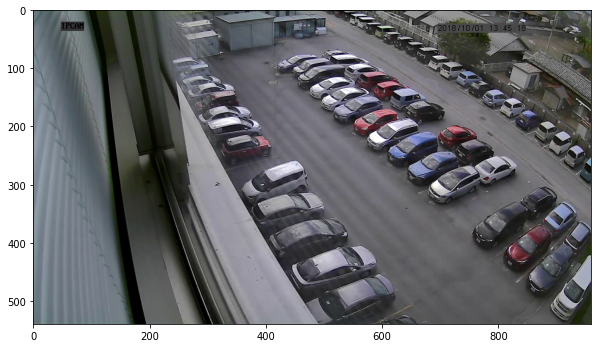

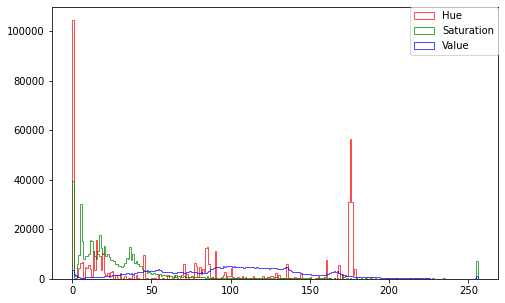

{'h_per_5': 0.0, 'h_per_50': 72.0, 'h_per_95': 176.0, 's_per_5': 0.0, 's_per_50': 72.0, 's_per_95': 176.0, 'v_per_5': 26.0, 'v_per_50': 102.0, 'v_per_95': 175.0}
(540, 960, 3)


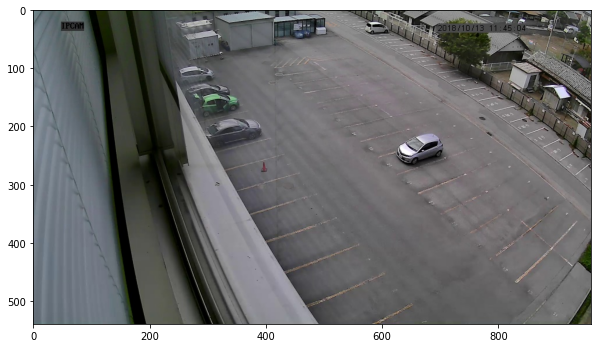

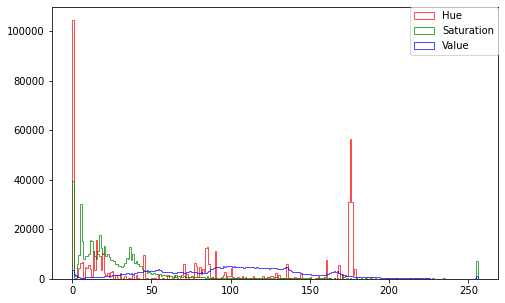

{'h_per_5': 0.0, 'h_per_50': 72.0, 'h_per_95': 176.0, 's_per_5': 0.0, 's_per_50': 72.0, 's_per_95': 176.0, 'v_per_5': 26.0, 'v_per_50': 102.0, 'v_per_95': 175.0}


In [21]:
# OpenCVで明るさ、色彩、彩度のヒストグラムを描画する！明るさを調整する！
# https://propen.dream-target.jp/blog/opencv-2

#元画像はこんな感じ(ここでは意味を理解しなくても大丈夫です)
img = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
plt.figure(figsize=(10, 8))

#imageの形状確認
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

def get_hsv_report(rgb_image, plot_show = False, statistics_show=False):
    """HSV色座標系に変換してヒストグラムを表示する。さらにパーセントタイルを利用して全体的に明るい、暗いなどを検出する

    Args:
        rgb_image(obj): rgbイメージ画像
        plot_show(bool): hsv票色系のグラフをプロットするか
        statistics_show(bool):標準偏差を出力するか(処理が重い)

    Returns:
       hsv票色系のパーセントタイルの値

    """
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV) # hsv票色系に変換
    h,s,v = cv2.split(hsv) # 各成分に分割
    
    def get_percentile_list(k, datas):
            #ここでは、パーセントタイルを 5,50,95パーセントとする。
            #パーセントタイルを利用して、輝度より明るい、暗い画像を判定などに利用する
            percentile = [5,50,95] #パーセントタイルの設定。ここは、必要に応じて変更する
            out_datas = {}
            for i in percentile:
                value = np.percentile(np.array(datas), i)
                s = k + "_"+str(i) 
                out_datas[s] = value
            return out_datas
    
    out_dict = {}
    
    plt.figure(figsize=(8, 5))
    
    #色相
    if(plot_show == True):
        plt.hist(h.ravel(),256,[0,256], color="red", alpha=0.7, histtype="step", label="Hue")
    data = get_percentile_list("h_per",h.ravel())
    out_dict.update(data)
    
    if(statistics_show == True):
        out_dict['h_pstdev'] =  statistics.pstdev(h.ravel()/255)
    
    #彩度
    if(plot_show == True):
        plt.hist(s.ravel(),256,[0,256], color="green",  alpha=0.7, histtype="step", label="Saturation")
    data = get_percentile_list("s_per",h.ravel())
    out_dict.update(data)
    if(statistics_show == True):
        out_dict['s_pstdev'] =  statistics.pstdev(s.ravel()/255)
    
    #輝度
    if(plot_show == True):
        plt.hist(v.ravel(),256,[0,256], color="blue",  alpha=0.7, histtype="step",label="Value")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
        plt.show()
        
    data = get_percentile_list("v_per",v.ravel())
    out_dict.update(data)
    if(statistics_show == True):
        out_dict['v_pstdev'] =  statistics.pstdev(v.ravel()/255)
    
    return out_dict

#すでに上のところでimgをRGBで読み込んでる
hsv_report =  get_hsv_report(img,True)
print(hsv_report)
#図を見ると明るさ(Value)の値が全体的に分布している。明るさのパーセンタイル95パーセントの値(v_per_95)が221.0なので明るめの画像と言える

#違う画像を読み込み
img2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1013-11-45-04.jpg")
plt.figure(figsize=(10, 8))

#imageの形状確認
print(img2.shape)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

#HSV色座標系を出してみる
hsv_report =  get_hsv_report(img,True)
print(hsv_report)
#図を見ると明るさ(Value)の値が全体的に左寄り(暗い)。明るさのパーセンタイル95パーセントの値(v_per_95)が150.0なので暗めの画像と言える



In [6]:
#2つの画像のヒストグラムマッチング
#https://cloud6.net/so/python/282369
    
import numpy as np
import cv2

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()#多次元のリストを1次元のリストにする
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)#３つ変数を作成（一意の値、一意の値の場所、一意の値の頻度）
    t_values, t_counts = np.unique(template, return_counts=True)
    #print(np.shape(bin_idx))#shape=518400
    
    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)　それぞれの累積分布関数を得る
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    #print(s_quantiles)追加
    s_quantiles /= s_quantiles[-1]# s_quantiles = s_quantiles/s_quantiles[-1]（逆行列（単位行列にする行列））
    #print(s_quantiles)追加
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)#sourceにおける明度値をtemplateの明度で補間
    #print(interp_t_values)#shape=256
#     print(interp_t_values)
#     print(bin_idx)
#     print(interp_t_values[bin_idx])
    
    return interp_t_values[bin_idx].reshape(oldshape)#sourceの一意の値に代入？し、oldshapeの形に変換。

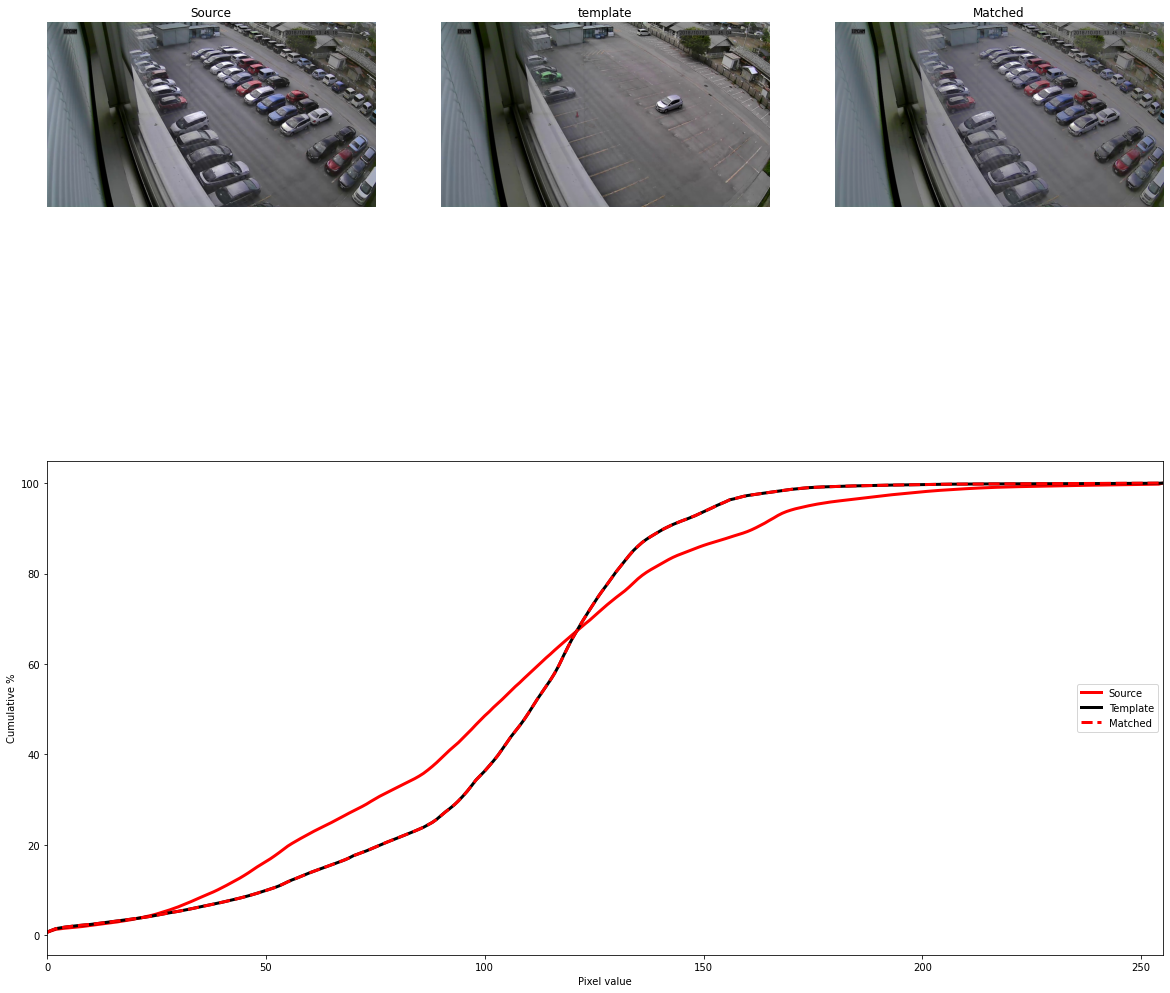

In [12]:
#続き
from matplotlib import pyplot as plt
#from scipy.misc import lena, ascent

source_ori = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
source_rgb=  cv2.cvtColor(source_ori,cv2.COLOR_BGR2RGB)  # 色空間をBGRからRGBに変換
source_hsv = cv2.cvtColor(source_ori,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
source = source_hsv[:,:,2]
#print(source)
#print(source.mean())

template_ori = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1013-11-45-04.jpg")
template_rgb=  cv2.cvtColor(template_ori,cv2.COLOR_BGR2RGB)  # 色空間をBGRからRGBに変換
template_hsv = cv2.cvtColor(template_ori,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
template = template_hsv[:,:,2]
#print(template.mean())

matched = hist_match(source, template)#ここで実行
#prinｔ(matched)


def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

source_ori2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
source_hsv2 = cv2.cvtColor(source_ori2,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
source_hsv2[:,:,2]= matched #代入
# #print(source_hsv2[:,:,2])
source_hsv2 = cv2.cvtColor(source_hsv2,cv2.COLOR_HSV2RGB)  # 色空間をHSVからRGBに変換

x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

fig = plt.figure(figsize=(20, 20))
gs = plt.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, :])
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

# ax1.imshow(source, cmap=plt.cm.gray)
# ax1.set_title('Source')
# ax2.imshow(template, cmap=plt.cm.gray)
# ax2.set_title('template')
# ax3.imshow(matched, cmap=plt.cm.gray)
# ax3.set_title('Matched')

ax1.imshow(source_rgb, cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template_rgb, cmap=plt.cm.gray)
ax2.set_title('template')
ax3.imshow(source_hsv2, cmap=plt.cm.gray)
ax3.set_title('Matched')

ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Pixel value')
ax4.set_ylabel('Cumulative %')
ax4.legend(loc=5)

#print(matched.mean())

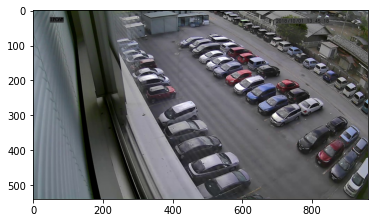

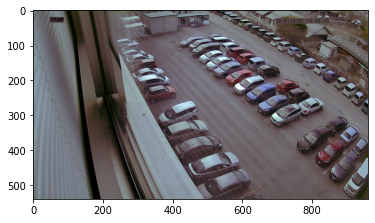

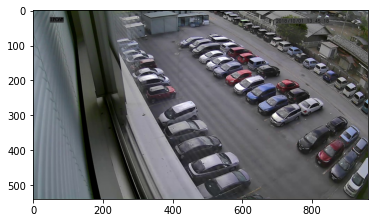

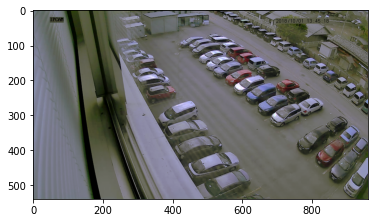

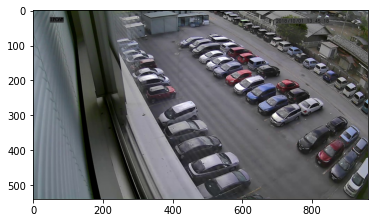

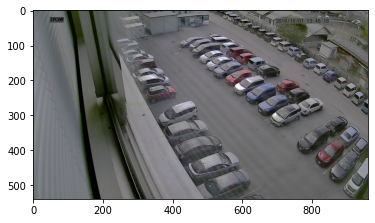

In [27]:
#画像のコントラスト及び明るさを他の画像に似せる
from matplotlib import pyplot as plt
#from scipy.misc import lena, ascent

source_ori = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
source_rgb=  cv2.cvtColor(source_ori,cv2.COLOR_BGR2RGB)  # 色空間をBGRからRGBに変換
#source_hsv = cv2.cvtColor(source_ori,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
#source = source_hsv[:,:,2]

template_ori = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1013-11-45-04.jpg")
template_rgb=  cv2.cvtColor(template_ori,cv2.COLOR_BGR2RGB)  # 色空間をBGRからRGBに変換
template_hsv = cv2.cvtColor(template_ori,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
#template = template_hsv[:,:,2]
#print(template.mean())

#matched = hist_match(source, template)#ここで実行

source_ori2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
source_rgb2=  cv2.cvtColor(source_ori2,cv2.COLOR_BGR2RGB)  # 色空間をBGRからRGBに変換
height, width, channel = source_rgb.shape
for i in range(channel):
    fig = plt.figure()
    plt.imshow(source_rgb)
    source = source_rgb[:,:,i]
    template = template_rgb[:,:,i]
    matched = hist_match(source, template)
    source_rgb2[:,:,i]= matched
    fig = plt.figure()
    plt.imshow(source_rgb2)

# def ecdf(x):
#     """convenience function for computing the empirical CDF"""
#     vals, counts = np.unique(x, return_counts=True)
#     ecdf = np.cumsum(counts).astype(np.float64)
#     ecdf /= ecdf[-1]
#     return vals, ecdf

# source_ori2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1001-13-45-19.jpg")
# source_hsv2 = cv2.cvtColor(source_ori2,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
# source_hsv2[:,:,2]= matched #代入
# # #print(source_hsv2[:,:,2])
# source_hsv2 = cv2.cvtColor(source_hsv2,cv2.COLOR_HSV2RGB)  # 色空間をHSVからRGBに変換

# x1, y1 = ecdf(source.ravel())
# x2, y2 = ecdf(template.ravel())
# x3, y3 = ecdf(matched.ravel())

# fig = plt.figure(figsize=(20, 20))
# gs = plt.GridSpec(2, 3)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
# ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
# ax4 = fig.add_subplot(gs[1, :])
# for aa in (ax1, ax2, ax3):
#     aa.set_axis_off()

# # ax1.imshow(source, cmap=plt.cm.gray)
# # ax1.set_title('Source')
# # ax2.imshow(template, cmap=plt.cm.gray)
# # ax2.set_title('template')
# # ax3.imshow(matched, cmap=plt.cm.gray)
# # ax3.set_title('Matched')

# ax1.imshow(source_rgb, cmap=plt.cm.gray)
# ax1.set_title('Source')
# ax2.imshow(template_rgb, cmap=plt.cm.gray)
# ax2.set_title('template')
# ax3.imshow(source_hsv2, cmap=plt.cm.gray)
# ax3.set_title('Matched')

# ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
# ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
# ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
# ax4.set_xlim(x1[0], x1[-1])
# ax4.set_xlabel('Pixel value')
# ax4.set_ylabel('Cumulative %')
# ax4.legend(loc=5)

#print(matched.mean())